In [3]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import numpy as np
import math

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
train_data = TimeSeriesDataFrame.from_path(f'Data/phil_socdata_trainLSTM.csv')
train_data.head()

ValueError: data must have a `timestamp` column

In [12]:
label = 'SOC'
train_data[label].describe()

count    427326.000000
mean         67.759531
std          24.669208
min           0.000000
25%          48.627468
50%          72.941200
75%          88.627480
max         100.000031
Name: SOC, dtype: float64

In [2]:
predictor = TimeSeriesPredictor(prediction_length=10,
                                target="SOC",
                                )

predictor.fit(train_data, presets = 'best_quality', time_limit=60)

'''
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    #'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    #'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 10*60  # train various models for ~10 min
num_trials = 50  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor = TabularPredictor(label=label).fit(
    train_data, time_limit=time_limit, auto_stack=True, presets='best_quality',
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)
'''


NameError: name 'TimeSeriesPredictor' is not defined

In [17]:
test_data = TimeSeriesDataFrame(f'Data/phil_socdata_testLSTM.csv')
test_data.head()

Loaded data from: Data/phil_socdata_testLSTM.csv | Columns = 6 / 6 | Rows = 18307 -> 18307


SOC        V     I     T
item_id timestamp                                          
SOC     1970-01-01 00:00:00  97.647087  397.125 -1.35  13.5
        1970-01-01 00:00:01  97.647087  397.125 -1.35  13.5
        1970-01-01 00:00:02  97.647087  397.125 -1.35  13.5
        1970-01-01 00:00:03  97.647087  397.125 -1.35  13.5
        1970-01-01 00:00:04  97.647087  397.125 -1.35  13.5

In [19]:
y_pred = predictor.predict(test_data)
y_pred.head()

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: TemporalFusionTransformer


mean        0.1        0.2        0.3  \
item_id timestamp                                                         
SOC     1900-01-01 05:05:07  13.332996  13.327004  13.328603  13.329422   
        1900-01-01 05:05:08  13.332979  13.326904  13.328645  13.329388   
        1900-01-01 05:05:09  13.332969  13.326847  13.328676  13.329370   
        1900-01-01 05:05:10  13.332961  13.326815  13.328697  13.329362   
        1900-01-01 05:05:11  13.332956  13.326796  13.328712  13.329355   

                                   0.4        0.5        0.6        0.7  \
item_id timestamp                                                         
SOC     1900-01-01 05:05:07  13.331572  13.332996  13.333930  13.335180   
        1900-01-01 05:05:08  13.331548  13.332979  13.333967  13.335140   
        1900-01-01 05:05:09  13.331538  13.332969  13.333989  13.335120   
        1900-01-01 05:05:10  13.331533  13.332961  13.334002  13.335112   
        1900-01-01 05:05:11  13.331532  13.332956  13.334011  13.335110   

                                   0.8        0.9  
item_id timestamp                                  
SOC     1900-01-01 05:05:07  13.335892  13.337877  
        1900-01-01 05:05:08  13.335977  13.337878  
        1900-01-01 05:05:09  13.336042  13.337879  
        1900-01-01 05:05:10  13.336087  13.337879  
        1900-01-01 05:05:11  13.336117  13.337879

In [21]:
predictor.evaluate(test_data)

Model not specified in predict, will default to the model with the best validation score: TemporalFusionTransformer


-9.218270619385538e-05

In [22]:
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,TemporalFusionTransformer,-0.000092,-0.011175,0.130878,0.399123,7.497882,7
1,SeasonalNaive,-0.004972,-0.024011,0.051949,3.410795,0.009630,2
2,Naive,-0.004972,-0.024011,2.499635,4.832959,0.006278,1
3,Theta/T1,-0.005667,-0.023999,4.147638,19.411070,0.000294,4
4,ARIMA,-0.007966,-0.024681,3.739829,56.116867,0.003004,5
5,ETS,-0.014140,-0.023951,0.252036,4.923406,0.003708,3
6,DeepAR/T1,-0.120204,-0.119278,0.254076,0.524333,8.787004,6


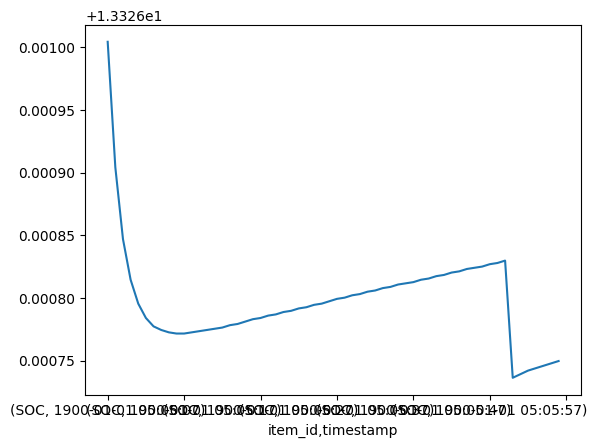

In [30]:
#plots the mean column in y_pred
import matplotlib.pyplot as plt
y_pred['0.1'].plot()
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a tuple

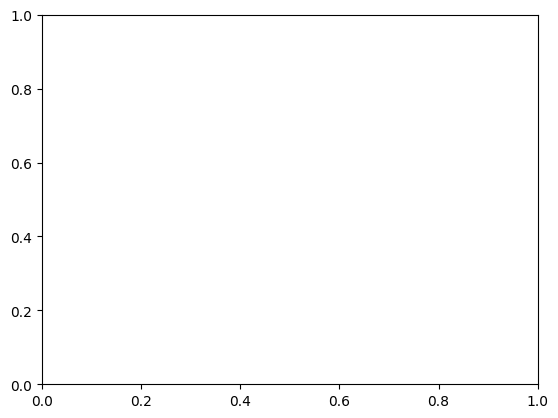

In [28]:
#plots the predicted vs actual values of the top performing model using matplotlib
import matplotlib.pyplot as plt
plt.plot(y_pred["mean"], label="Predictions")
plt.plot(test_data[label], label="True Values")
plt.legend()
plt.show()

In [22]:
mse_test = np.mean(((y_pred - test_data[label])**2))
rmse_test = math.sqrt(mse_test)
print("test data rmse", rmse_test)

test data rmse 3.6227905364757076
